In [ ]:
# THIS CODE IS NOT USED IN THE FINAL PROJECT

In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
!pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow import convert_to_tensor


In [ ]:
from tensorflow import constant as tf
import tensorflow as tf

from tensorflow import float32 as tf
from tensorflow.python.ops import nn_ops as tf
from tensorflow.python.ops import math_ops as tf

from tensorflow.python.ops import array_ops as tf
from tensorflow.python.ops import control_flow_ops as tf
from tensorflow.python.ops import check_ops as tf
from tensorflow.python.ops import gen_math_ops as tf
from tensorflow.python.ops import array_ops as tf
from tensorflow.python.ops import math_ops as tf
from keras.preprocessing.image import ImageDataGenerator
import cv2

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
import splitfolders

In [ ]:
input_folder="/content/drive/MyDrive/Finals/input"
output = "/content/drive/MyDrive/Finals/preprocessed"
splitfolders.ratio(input_folder,output, seed = 42,ratio=(.8, .2))
help(splitfolders.ratio)
SEED = 42






Copying files: 5200 files [02:06, 41.04 files/s]

Help on function ratio in module splitfolders.split:

ratio(input, output='output', seed=1337, ratio=(0.8, 0.1, 0.1), group_prefix=None, move=False)



In [ ]:

IMG_HEIGHT, IMG_WIDTH = (224, 224)
BATCH_SIZE = 32

In [ ]:

train_data_dir = r"/content/drive/MyDrive/Finals/preprocessed/train"

valid_data_dir = r"/content/drive/MyDrive/Finals/preprocessed/val"

In [ ]:
def filter_noise(image, threshold=127):

  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
  
  blur = cv2.GaussianBlur(gray, (3,3), 0)
  
  
  thresh = cv2.threshold(blur, threshold, 255, cv2.THRESH_BINARY)[1]
  

  thresh = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
  
  
  return thresh

In [ ]:
def tf_equalize_histogram(image):
    values_range = tf.constant([0., 255.], dtype = tf.float32)
    histogram = tf.histogram_fixed_width(tf.to_float(image), values_range, 256)
    cdf = tf.cumsum(histogram)
    cdf_min = cdf[tf.reduce_min(tf.where(tf.greater(cdf, 0)))]

    img_shape = tf.shape(image)
    pix_cnt = img_shape[-3] * img_shape[-2]
    px_map = tf.round(tf.to_float(cdf - cdf_min) * 255. / tf.to_float(pix_cnt - 1))
    px_map = tf.cast(px_map, tf.uint8)

    eq_hist = tf.expand_dims(tf.gather_nd(px_map, tf.cast(image, tf.int32)), 2)
    return eq_hist


In [ ]:
def reduce_hue(image, amount=100):
  if image.shape[-1] == 1:
    
    image = np.stack([image, image, image], axis=-1)

  
  hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  
  hue = hsv_image[:, :, 0]

  
  hue -= amount

  
  hue = np.clip(hue, 0, 255)

  
  hsv_image[:, :, 0] = hue

 
  return cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

In [ ]:
train_datagen = ImageDataGenerator(
  preprocessing_function=reduce_hue,
  rescale=1./255, # Normalize pixel values to the range [0, 1]
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  width_shift_range=0.2,
  height_shift_range=0.2,
  fill_mode='nearest',
  validation_split=0.2)


In [ ]:
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical")
valid_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
     
    class_mode="categorical")






Found 4160 images belonging to 4 classes.
Found 1040 images belonging to 4 classes.


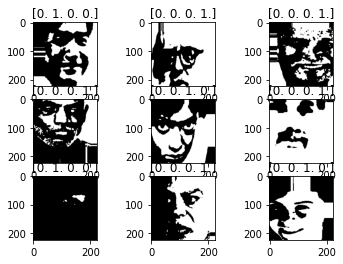

In [ ]:


# Create a figure with a grid of 3x3 subplots
fig, axs = plt.subplots(3, 3)

# Load a batch of images and labels from the train_generator generator
images, labels = train_generator.next()

# Iterate over the subplots and show the images in each one
for i, ax in enumerate(axs.flat):
    # Set the title for each subplot to the corresponding label
    ax.set_title(labels[i])
    
    # Use the imshow method to show the image in each subplot
    ax.imshow(images[i])

# Show the plot
plt.show()


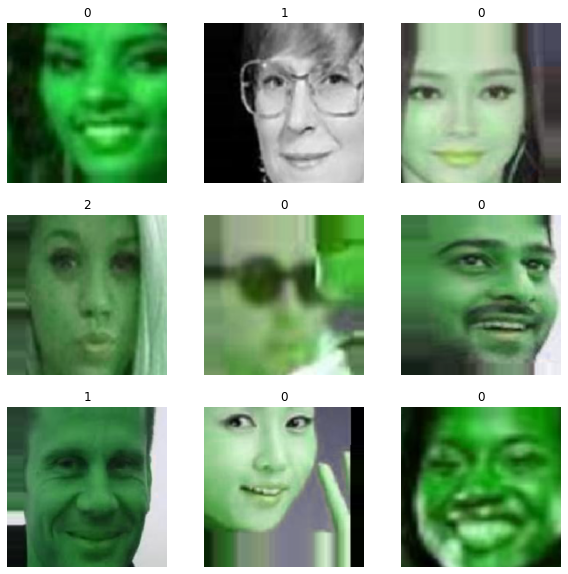

In [ ]:
images, labels = train_generator.next()

# Create a figure with a grid of 3x3 subplots
plt.figure(figsize=(10, 10))

# Iterate over the images and labels in the batch
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(int(np.argmax(labels[i])))
    plt.axis("off")

# Display the figure
plt.show()

In [ ]:
# Get a batch of images and labels from the train_generator
images, labels = train_generator.next()

# Create a figure with a grid of 3x3 subplots
plt.figure(figsize=(10, 10))

# Iterate over the images and labels in the batch
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(int(np.argmax(labels[i])))
    plt.axis("off")

# Display the figure
plt.show()


In [ ]:
folder= '/content/drive/MyDrive/Finals/preprocessed/train/25-30'

In [ ]:
files = os.listdir()

In [ ]:
files = os.listdir(folder)

# Count the number of files that have an image file extension (e.g., .jpg, .png, etc.)
image_count = 0
for file in files:
  if file.endswith('.jpg') or file.endswith('.png') or file.endswith('.gif') or file.endswith('.bmp') or file.endswith('.tif'):
    image_count += 1

# Print the number of images in the folder
print(f'There are {image_count} images in the folder.')

There are 1040 images in the folder.
